In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'gym/train'
data_test_path = 'gym/test'
data_val_path = 'gym/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 2215 files belonging to 13 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['zArmCurlMuchine',
 'zHipAbduction',
 'zLegExtension',
 'zLyingLegCurl',
 'zback_extension',
 'zcable-machine',
 'zcd',
 'zchest_press',
 'zdown',
 'zpd',
 'zpower_leg_press',
 'zsmith_machine',
 'zsp']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 214 files belonging to 13 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 158 files belonging to 13 classes.


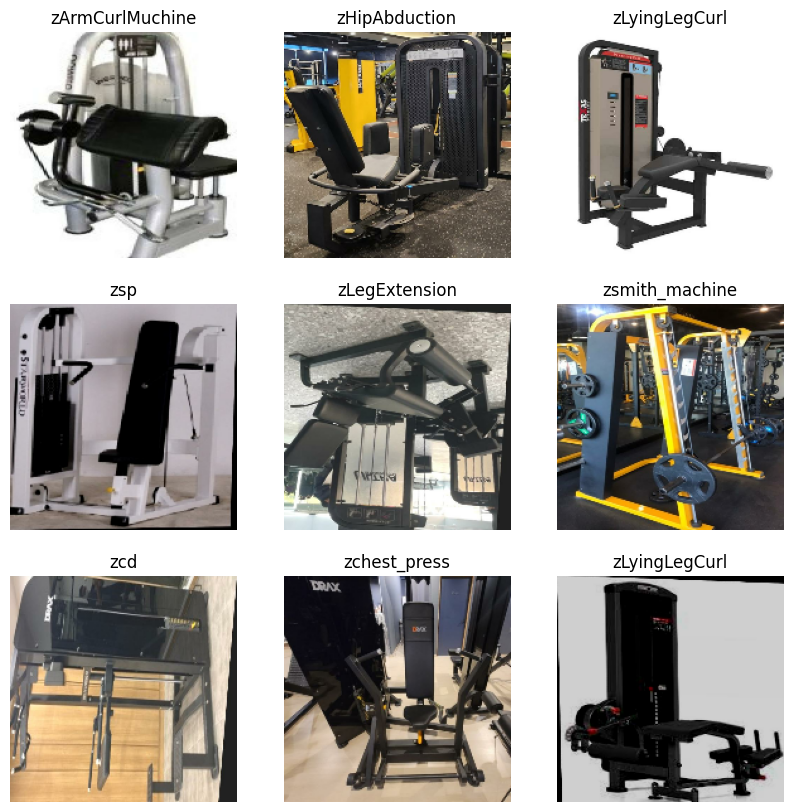

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.0899 - loss: 3.8241 - val_accuracy: 0.1822 - val_loss: 2.3777
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - accuracy: 0.3008 - loss: 2.1715 - val_accuracy: 0.5140 - val_loss: 1.5995
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.5635 - loss: 1.4135 - val_accuracy: 0.6402 - val_loss: 1.2875
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - accuracy: 0.7493 - loss: 0.7971 - val_accuracy: 0.5701 - val_loss: 1.4383
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.8422 - loss: 0.4846 - val_accuracy: 0.5748 - val_loss: 1.7633
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.8853 - loss: 0.3510 - val_accuracy: 0.4907 - val_loss: 2.0187
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.9123 - loss: 0.2679 - val_accuracy: 0.5327 - val_loss: 2.1177
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.9199 - loss: 0.2344 - val_accu

Text(0.5, 1.0, 'Loss')

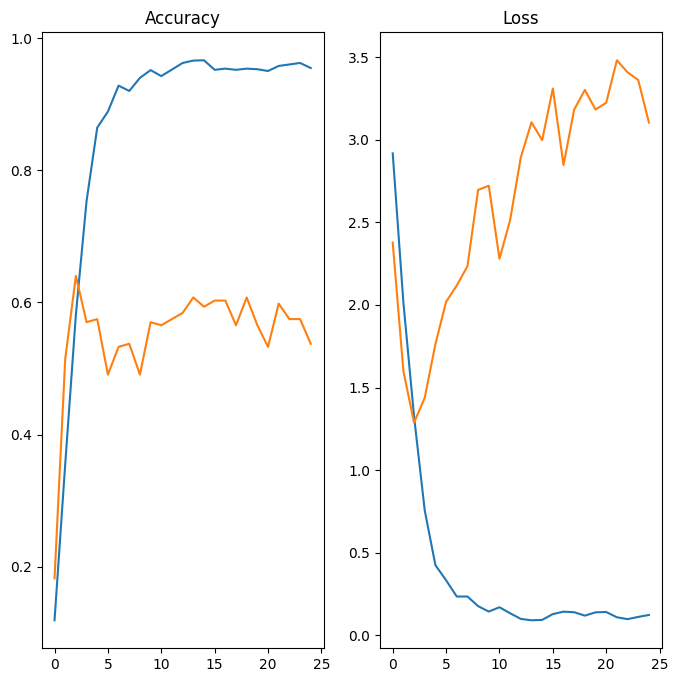

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [23]:
image = 'cable.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [25]:
score = tf.nn.softmax(predict)

In [26]:
print('gym machine in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

gym machine in image is zcable-machine with accuracy of 99.92


In [27]:
model.save('Image_classify.keras')